Accuracy: 1.0


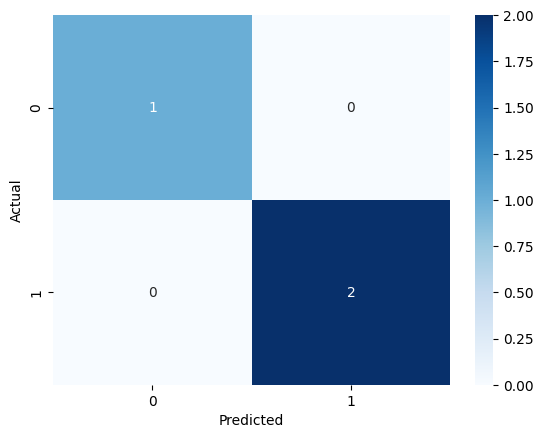

Stress Level: Medium


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


data = pd.read_csv("student_stress_data.csv")
data.head()

data['stress_level'] = data['stress_level'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})

X = data.drop('stress_level', axis=1)
y = data['stress_level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

new_student = [[4, 6, 70, 7, 4]]
prediction = model.predict(new_student)

if prediction[0] == 0:
    print("Stress Level: Low")
elif prediction[0] == 1:
    print("Stress Level: Medium")
else:
    print("Stress Level: High")





In [ ]:
!pip install streamlit pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("student_stress_data.csv")
data['stress_level'] = data['stress_level'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})

X = data.drop('stress_level', axis=1)
y = data['stress_level']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

st.title("Student Stress Level Prediction")

study_hours = st.slider("Study Hours", 0, 10, 4)
sleep_hours = st.slider("Sleep Hours", 0, 10, 6)
attendance = st.slider("Attendance (%)", 0, 100, 70)
exam_pressure = st.slider("Exam Pressure (1-10)", 1, 10, 7)
mental_health = st.slider("Mental Health Score (1-10)", 1, 10, 4)

if st.button("Predict Stress Level"):
    result = model.predict([[study_hours, sleep_hours, attendance, exam_pressure, mental_health]])

    if result[0] == 0:
        st.success("Stress Level: Low")
    elif result[0] == 1:
        st.warning("Stress Level: Medium")
    else:
        st.error("Stress Level: High")



Writing app.py


In [ ]:
%%writefile requirements.txt
streamlit
pandas
scikit-learn


Writing requirements.txt
